In [1]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.impute import KNNImputer
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import accuracy_score, precision_score, recall_score, average_precision_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingClassifier
from math import sqrt
from sklearn.linear_model  import  LogisticRegression
from sklearn.feature_selection import SequentialFeatureSelector as sfs
from sklearn import svm

In [2]:
# Import dataset
data = pd.read_csv(r'D:\Personal Data\School\SPH6004 Advanced Statistical Learning\Individual Assignment\Assignment_1_data.csv')

In [3]:
data

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,NaN,3459.0,2.0,0.0,NaN,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,NaN,2020.0,NaN,1.0,NaN,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,NaN,3050.0,NaN,1.0,0.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,NaN,1592.0,NaN,0.0,NaN,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,NaN,339.0,2.0,0.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,NaN,697.0,NaN,0.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,NaN,2000.0,NaN,0.0,NaN,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,NaN,3500.0,NaN,0.0,NaN,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,NaN,1900.0,NaN,0.0,NaN,0.0,1.0,0.0,5,False


# Data preparation

In [4]:
# Data exploration, completeness
data.isnull().sum()

gender                            0
age                               0
heart_rate_min                   72
heart_rate_max                   72
heart_rate_mean                  72
mbp_min                          88
mbp_max                          88
mbp_mean                         88
sbp_min                         146
sbp_max                         146
sbp_mean                        146
dbp_min                         148
dbp_max                         148
dbp_mean                        148
temperature_min                 363
temperature_max                 363
temperature_mean                363
lactate_min                   20559
lactate_max                   20559
ph_min                        17629
ph_max                        17629
chloride_min                  30360
chloride_max                  30360
calcium_min                   27200
calcium_max                   27200
sodium_min                    29935
sodium_max                    29935
glucose_min                 

In [5]:
# Data exploration, duplicates
data[data.duplicated() == True]

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,bilirubin_indirect_min,urineoutput,sofa_respiration,sofa_coagulation,sofa_liver,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome


In [6]:
# Plot visualisation of drop threshold
l=[]
lmissing = []
NArows = []
TotalNA = []
for n in range(1,11):
    dropmissing = []
    for i in data.columns:
        if data[i].isnull().sum()/len(data) >= n/10:
            dropmissing.append(i)
    d = data.drop(dropmissing,axis=1)
    d1 = d.dropna()
    TotalNA.append(d.isnull().sum().sum())
    NArows.append(len(d)-len(d1))
    l.append(len(d1))
    lmissing.append(len(dropmissing))
    print('Drop threshold: {}% ({} dropped variables)/ Total missing values: {}/ Number of rows with missing values: {}'.format(n/10*100,len(dropmissing),d.isnull().sum().sum(),len(d)-len(d1)))

Drop threshold: 10.0% (28 dropped variables)/ Total missing values: 6265/ Number of rows with missing values: 2143
Drop threshold: 20.0% (26 dropped variables)/ Total missing values: 14553/ Number of rows with missing values: 5872
Drop threshold: 30.0% (26 dropped variables)/ Total missing values: 14553/ Number of rows with missing values: 5872
Drop threshold: 40.0% (26 dropped variables)/ Total missing values: 14553/ Number of rows with missing values: 5872
Drop threshold: 50.0% (15 dropped variables)/ Total missing values: 210404/ Number of rows with missing values: 27733
Drop threshold: 60.0% (13 dropped variables)/ Total missing values: 251522/ Number of rows with missing values: 28956
Drop threshold: 70.0% (13 dropped variables)/ Total missing values: 251522/ Number of rows with missing values: 28956
Drop threshold: 80.0% (10 dropped variables)/ Total missing values: 334824/ Number of rows with missing values: 35236
Drop threshold: 90.0% (6 dropped variables)/ Total missing values

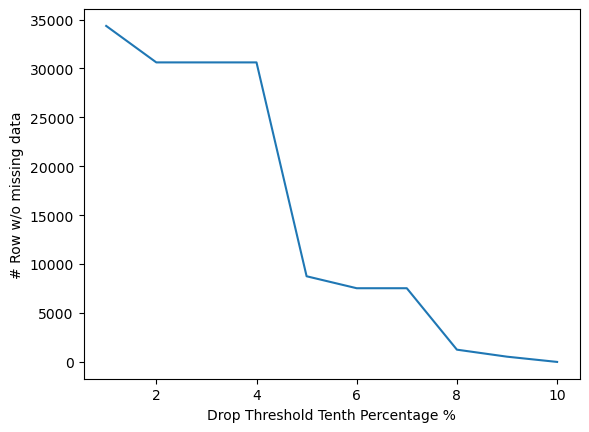

In [7]:
plt.plot(range(1,11),l)
plt.xlabel("Drop Threshold Tenth Percentage %")
plt.ylabel("# Row w/o missing data");

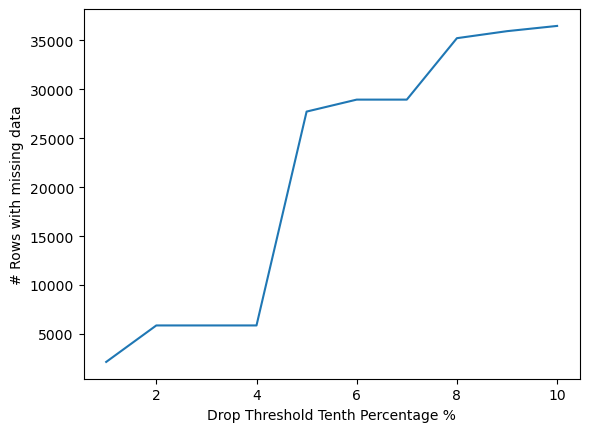

In [8]:
plt.plot(range(1,11),NArows)
plt.xlabel("Drop Threshold Tenth Percentage %")
plt.ylabel("# Rows with missing data");

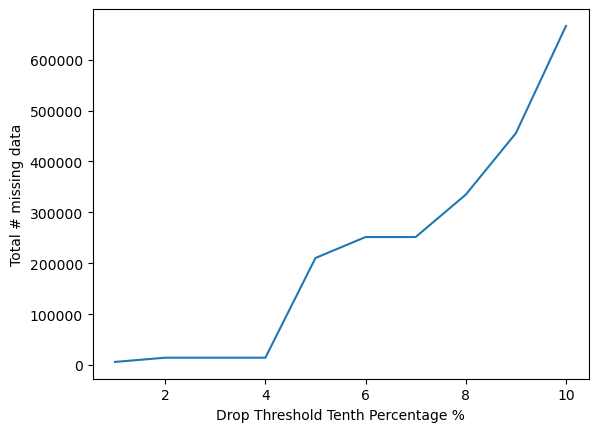

In [9]:
plt.plot(range(1,11),TotalNA)
plt.xlabel("Drop Threshold Tenth Percentage %")
plt.ylabel("Total # missing data");

In [10]:
# Columns to be dropped (>= 0.4 missing)
dropmissing = []
for i in data.columns:
    if data[i].isnull().sum()/len(data) >= 0.4:
        dropmissing.append(i)
dropmissing

# Data after droping variable (columns)
dataDropcol = data.drop(dropmissing,axis=1)
dataDropcol = dataDropcol.reset_index(drop=True)
dataDropcol

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,hemoglobin_max,pt_min,pt_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome
0,M,54.550390,93.0,115.0,103.500000,57.0,100.0,82.733333,87.0,163.0,...,8.9,13.2,13.7,3459.0,0.0,1.0,0.0,1.0,3,False
1,M,86.324653,50.0,61.0,54.333333,61.0,93.0,71.695652,95.0,141.0,...,13.3,9.9,11.1,2020.0,1.0,1.0,1.0,1.0,8,False
2,M,40.270146,70.0,105.0,83.434783,66.0,92.0,76.695652,94.0,129.0,...,7.1,15.2,15.3,3050.0,1.0,1.0,1.0,0.0,4,False
3,M,73.383547,68.0,98.0,83.880000,74.0,101.0,84.694444,83.0,148.0,...,12.8,NaN,NaN,1592.0,0.0,0.0,0.0,1.0,6,False
4,M,70.724748,77.0,95.0,85.771429,30.0,90.0,62.657143,52.0,129.0,...,12.7,12.6,13.4,339.0,0.0,4.0,1.0,3.0,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,84.952721,59.0,80.0,68.538462,2.0,95.0,74.346154,109.0,152.0,...,12.0,12.5,12.5,697.0,0.0,1.0,4.0,1.0,10,False
36485,F,30.583263,59.0,104.0,79.954545,67.0,91.0,77.820000,94.0,140.0,...,11.5,12.7,12.7,2000.0,0.0,1.0,1.0,0.0,0,False
36486,F,60.095765,71.0,94.0,82.625000,51.0,92.0,61.772727,90.0,120.0,...,9.6,15.4,79.7,3500.0,0.0,1.0,0.0,0.0,3,False
36487,M,78.847051,63.0,86.0,72.836735,113.0,121.0,117.000000,148.0,219.0,...,12.8,13.3,13.3,1900.0,0.0,0.0,1.0,0.0,5,False


In [11]:
# Data outcome counts
data.outcome.value_counts()

False    35160
True      1329
Name: outcome, dtype: int64

In [12]:
# Tagging missing data
MissingData = dataDropcol.drop(dataDropcol.dropna().index)
CompleteData = dataDropcol.dropna()
MissingData['missing'] = True
dataDropcol['missing'] = MissingData['missing']
dataDropcol['missing'] = dataDropcol['missing'].fillna(False)

In [13]:
# Separating continuous and categorical variables
dataDropcolCon = dataDropcol[['age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max',
       'creatinine_min', 'creatinine_max', 'hemoglobin_min', 'hemoglobin_max',
       'pt_min', 'pt_max', 'urineoutput','charlson_comorbidity_index']]
dataDropcolCat = dataDropcol[['gender','sofa_coagulation','sofa_cardiovascular', 
                              'sofa_cns', 'sofa_renal','outcome','missing']]

In [14]:
# Two-tailed t-test, comparison between missing dataset and complete dataset (0.95 confidence level)
for i in dataDropcolCon.columns: 
    Missing = dataDropcol[dataDropcol['missing']==1][i]
    Complete = dataDropcol[dataDropcol['missing']==0][i]
    t_value,p_value=stats.ttest_ind(Missing, Complete)
    print(i)
    # Level of significance
    alpha = 0.05
    # conclusion
    if p_value < alpha/2:
        print('Reject Null Hypothesis (Significant difference between two samples)',"\n")
    else:
        print('Do not Reject Null Hypothesis (No significant difference between two samples)',"\n")

age
Reject Null Hypothesis (Significant difference between two samples) 

heart_rate_min
Do not Reject Null Hypothesis (No significant difference between two samples) 

heart_rate_max
Do not Reject Null Hypothesis (No significant difference between two samples) 

heart_rate_mean
Do not Reject Null Hypothesis (No significant difference between two samples) 

mbp_min
Do not Reject Null Hypothesis (No significant difference between two samples) 

mbp_max
Do not Reject Null Hypothesis (No significant difference between two samples) 

mbp_mean
Do not Reject Null Hypothesis (No significant difference between two samples) 

sbp_min
Do not Reject Null Hypothesis (No significant difference between two samples) 

sbp_max
Do not Reject Null Hypothesis (No significant difference between two samples) 

sbp_mean
Do not Reject Null Hypothesis (No significant difference between two samples) 

dbp_min
Do not Reject Null Hypothesis (No significant difference between two samples) 

dbp_max
Do not Reject 

In [212]:
# Chi-square test, comparison between missing dataset and complete dataset (0.95 confidence level)
columns = dataDropcolCat.drop(['missing'],axis=1)
for i in columns.columns:
    ct = pd.crosstab(dataDropcol['missing'] ,dataDropcol[i] )
    c, p, dof, expected = stats.chi2_contingency(ct) 
    print (ct)
    prob = 0.95
    critical = stats.chi2.ppf(prob, dof)
    if p < 1-prob:
        print('Dependent (reject H0)',"\n")
    else:
        print('Independent (fail to reject H0)',"\n")

gender       F      M
missing              
False    13658  16959
True      2951   2921
Dependent (reject H0) 

sofa_coagulation    0.0   1.0   2.0  3.0  4.0
missing                                      
False             20559  6173  2706  896  283
True               4165  1000   351   82   20
Dependent (reject H0) 

sofa_cardiovascular   0.0    1.0  2.0   3.0   4.0
missing                                          
False                6632  20401  258  1456  1870
True                 1383   3804   28   305   265
Dependent (reject H0) 

sofa_cns    0.0    1.0   2.0   3.0   4.0
missing                                 
False     12743  11852  2703  2202  1117
True       2600   2182   513   380   176
Dependent (reject H0) 

sofa_renal    0.0   1.0   2.0   3.0   4.0
missing                                  
False       17522  7037  2666  1904  1488
True         3332   930   398   379   811
Dependent (reject H0) 

outcome  False  True
missing             
False    29412  1205
True      574

In [16]:
# Normalize data before imputation
scaler = preprocessing.MinMaxScaler()
scaler.fit(dataDropcolCon)
scaled = scaler.transform(dataDropcolCon)
normalized = dataDropcol
normalized[['age', 'heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max',
       'creatinine_min', 'creatinine_max', 'hemoglobin_min', 'hemoglobin_max',
       'pt_min', 'pt_max', 'urineoutput','charlson_comorbidity_index']] = scaled
normalized

,gender,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,...,pt_min,pt_max,urineoutput,sofa_coagulation,sofa_cardiovascular,sofa_cns,sofa_renal,charlson_comorbidity_index,outcome,missing
0,M,0.430669,0.545455,0.305019,0.512853,0.424983,0.197581,0.368933,0.467033,0.376238,...,0.039305,0.038881,0.399185,0.0,1.0,0.0,1.0,0.15,False,False
1,M,0.805087,0.266234,0.096525,0.176649,0.455247,0.169355,0.267684,0.510989,0.303630,...,0.014361,0.021146,0.367811,1.0,1.0,1.0,1.0,0.40,False,False
2,M,0.262395,0.396104,0.266409,0.375646,0.493077,0.165323,0.313550,0.505495,0.264026,...,0.054422,0.049795,0.390267,1.0,1.0,1.0,0.0,0.20,False,False
3,M,0.652593,0.383117,0.239382,0.378691,0.553605,0.201613,0.386922,0.445055,0.326733,...,NaN,NaN,0.358479,0.0,0.0,0.0,1.0,0.30,False,True
4,M,0.621262,0.441558,0.227799,0.391624,0.220701,0.157258,0.184774,0.274725,0.264026,...,0.034769,0.036835,0.331160,0.0,4.0,1.0,3.0,0.50,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,F,0.788920,0.324675,0.169884,0.273785,0.008852,0.177419,0.291998,0.587912,0.339934,...,0.034014,0.030696,0.338966,0.0,1.0,4.0,1.0,0.50,False,False
36485,F,0.148247,0.324675,0.262548,0.351848,0.500643,0.161290,0.323863,0.505495,0.300330,...,0.035525,0.032060,0.367375,0.0,1.0,1.0,0.0,0.00,False,False
36486,F,0.496014,0.402597,0.223938,0.370109,0.379587,0.165323,0.176661,0.483516,0.234323,...,0.055933,0.489086,0.400078,0.0,1.0,0.0,0.0,0.15,False,False
36487,M,0.716973,0.350649,0.193050,0.303176,0.848680,0.282258,0.683262,0.802198,0.561056,...,0.040060,0.036153,0.365194,0.0,0.0,1.0,0.0,0.25,False,False


In [17]:
# Normalized data for kNN imputation
Before_Impute = normalized[['heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max',
       'creatinine_min', 'creatinine_max', 'hemoglobin_min', 'hemoglobin_max',
       'pt_min', 'pt_max', 'urineoutput']]

In [18]:
# Imputation using kNN imputer (Continuous)
imputer = KNNImputer(n_neighbors=int(sqrt(Before_Impute.count().sum())))
imputed = imputer.fit_transform(Before_Impute)
After_imputationCon = dataDropcol
After_imputationCon[['heart_rate_min', 'heart_rate_max', 'heart_rate_mean',
       'mbp_min', 'mbp_max', 'mbp_mean', 'sbp_min', 'sbp_max', 'sbp_mean',
       'dbp_min', 'dbp_max', 'dbp_mean', 'temperature_min', 'temperature_max',
       'temperature_mean', 'glucose_min', 'glucose_max', 'wbc_min', 'wbc_max',
       'creatinine_min', 'creatinine_max', 'hemoglobin_min', 'hemoglobin_max',
       'pt_min', 'pt_max', 'urineoutput']] = imputed
After_imputationCon = After_imputationCon.drop(['gender','sofa_coagulation','sofa_cardiovascular', 
                              'sofa_cns', 'sofa_renal','outcome','missing'], axis = 1)
After_imputationCon

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,wbc_min,wbc_max,creatinine_min,creatinine_max,hemoglobin_min,hemoglobin_max,pt_min,pt_max,urineoutput,charlson_comorbidity_index
0,0.430669,0.545455,0.305019,0.512853,0.424983,0.197581,0.368933,0.467033,0.376238,0.513456,...,0.038295,0.028249,0.034700,0.037296,0.391813,0.288889,0.039305,0.038881,0.399185,0.15
1,0.805087,0.266234,0.096525,0.176649,0.455247,0.169355,0.267684,0.510989,0.303630,0.417304,...,0.024309,0.020388,0.041009,0.032634,0.608187,0.533333,0.014361,0.021146,0.367811,0.40
2,0.262395,0.396104,0.266409,0.375646,0.493077,0.165323,0.313550,0.505495,0.264026,0.427495,...,0.013986,0.016949,0.015773,0.013986,0.274854,0.188889,0.054422,0.049795,0.390267,0.20
3,0.652593,0.383117,0.239382,0.378691,0.553605,0.201613,0.386922,0.445055,0.326733,0.493823,...,0.042957,0.044215,0.037855,0.034965,0.561404,0.505556,0.038335,0.042331,0.358479,0.30
4,0.621262,0.441558,0.227799,0.391624,0.220701,0.157258,0.184774,0.274725,0.264026,0.300673,...,0.030969,0.028494,0.104101,0.090909,0.467836,0.500000,0.034769,0.036835,0.331160,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.788920,0.324675,0.169884,0.273785,0.008852,0.177419,0.291998,0.587912,0.339934,0.529344,...,0.056610,0.047408,0.047319,0.039627,0.532164,0.461111,0.034014,0.030696,0.338966,0.50
36485,0.148247,0.324675,0.262548,0.351848,0.500643,0.161290,0.323863,0.505495,0.300330,0.447245,...,0.062937,0.046426,0.028391,0.020979,0.543860,0.433333,0.035525,0.032060,0.367375,0.00
36486,0.496014,0.402597,0.223938,0.370109,0.379587,0.165323,0.176661,0.483516,0.234323,0.388299,...,0.031635,0.030459,0.012618,0.011655,0.385965,0.327778,0.055933,0.489086,0.400078,0.15
36487,0.716973,0.350649,0.193050,0.303176,0.848680,0.282258,0.683262,0.802198,0.561056,0.754257,...,0.023310,0.018914,0.031546,0.023310,0.549708,0.505556,0.040060,0.036153,0.365194,0.25


In [19]:
# One hot enconding categorical variables
dataDropcolCat = dataDropcolCat.astype('category')
hotcoded = pd.get_dummies(dataDropcolCat)
hotcoded

,gender_F,gender_M,sofa_coagulation_0.0,sofa_coagulation_1.0,sofa_coagulation_2.0,sofa_coagulation_3.0,sofa_coagulation_4.0,sofa_cardiovascular_0.0,sofa_cardiovascular_1.0,sofa_cardiovascular_2.0,...,sofa_cns_4.0,sofa_renal_0.0,sofa_renal_1.0,sofa_renal_2.0,sofa_renal_3.0,sofa_renal_4.0,outcome_False,outcome_True,missing_False,missing_True
0,0,1,1,0,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
1,0,1,0,1,0,0,0,0,1,0,...,0,0,1,0,0,0,1,0,1,0
2,0,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
3,0,1,1,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,1,0,1,0,0,0,0,0,1,0,...,1,0,1,0,0,0,1,0,1,0
36485,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
36486,1,0,1,0,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,1,0
36487,0,1,1,0,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [20]:
hotcoded.columns

Index(['gender_F', 'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0', 'sofa_coagulation_4.0',
       'sofa_cardiovascular_0.0', 'sofa_cardiovascular_1.0',
       'sofa_cardiovascular_2.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_cns_3.0', 'sofa_cns_4.0', 'sofa_renal_0.0',
       'sofa_renal_1.0', 'sofa_renal_2.0', 'sofa_renal_3.0', 'sofa_renal_4.0',
       'outcome_False', 'outcome_True', 'missing_False', 'missing_True'],
      dtype='object')

In [21]:
# Imputation using kNN imputer (Categorical)
imputer = KNNImputer(n_neighbors=sqrt(int(hotcoded.count().sum())))
imputed = imputer.fit_transform(hotcoded)
After_imputation = After_imputationCon
After_imputation[['gender_F', 'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0', 'sofa_coagulation_4.0',
       'sofa_cardiovascular_0.0', 'sofa_cardiovascular_1.0',
       'sofa_cardiovascular_2.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_cns_3.0', 'sofa_cns_4.0', 'sofa_renal_0.0',
       'sofa_renal_1.0', 'sofa_renal_2.0', 'sofa_renal_3.0', 'sofa_renal_4.0',
       'outcome_False', 'outcome_True', 'missing_False', 'missing_True']] = imputed
After_imputation

,age,heart_rate_min,heart_rate_max,heart_rate_mean,mbp_min,mbp_max,mbp_mean,sbp_min,sbp_max,sbp_mean,...,sofa_cns_4.0,sofa_renal_0.0,sofa_renal_1.0,sofa_renal_2.0,sofa_renal_3.0,sofa_renal_4.0,outcome_False,outcome_True,missing_False,missing_True
0,0.430669,0.545455,0.305019,0.512853,0.424983,0.197581,0.368933,0.467033,0.376238,0.513456,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,0.805087,0.266234,0.096525,0.176649,0.455247,0.169355,0.267684,0.510989,0.303630,0.417304,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,0.262395,0.396104,0.266409,0.375646,0.493077,0.165323,0.313550,0.505495,0.264026,0.427495,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.652593,0.383117,0.239382,0.378691,0.553605,0.201613,0.386922,0.445055,0.326733,0.493823,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.621262,0.441558,0.227799,0.391624,0.220701,0.157258,0.184774,0.274725,0.264026,0.300673,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36484,0.788920,0.324675,0.169884,0.273785,0.008852,0.177419,0.291998,0.587912,0.339934,0.529344,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36485,0.148247,0.324675,0.262548,0.351848,0.500643,0.161290,0.323863,0.505495,0.300330,0.447245,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36486,0.496014,0.402597,0.223938,0.370109,0.379587,0.165323,0.176661,0.483516,0.234323,0.388299,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
36487,0.716973,0.350649,0.193050,0.303176,0.848680,0.282258,0.683262,0.802198,0.561056,0.754257,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [22]:
# Reverse one hot encoding - outcome
outcome = After_imputation[['outcome_True','outcome_False']]
After_imputation['outcome'] = pd.get_dummies(outcome).idxmax(1)
After_imputation['outcome'] = After_imputation.outcome.replace({'outcome_True':True,'outcome_False':False})
After_imputation = After_imputation.drop(['outcome_True','outcome_False'], axis = 1)

# Model evaluation 

In [155]:
# Split data
x_trn, x_tst = train_test_split (
    After_imputation,
    test_size=0.20,
    random_state=1)

y_trn = x_trn['outcome']
x_trn = x_trn.drop(['outcome'],axis=1)

y_tst = x_tst['outcome']
x_tst = x_tst.drop(['outcome'],axis=1)

# Random Under sampling to take into consideration of imablance outcome class
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0, replacement = True)
x_resampled, y_resampled = rus.fit_resample(x_trn, y_trn)

## Baseline modeling

In [24]:
# Definition of results to be printed
def print_results(results):
        print('BEST PRAMS: {}\n'.format(results.best_params_))
        
        means=results.cv_results_['mean_test_score']
        stds=results.cv_results_['std_test_score']
        for mean,std,params in zip(means,stds,results.cv_results_['params']):
                print('{} (+/-{}) for {}'.format(round(mean,3),round(std*2,3),params))

#### Random forest model

Accuracy: 0.693 (0.018)/ Precision: 0.700 (0.026)/ Recall: 0.683 (0.032)/ F1: 0.695 (0.022)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      7015
           1       0.09      0.76      0.16       283

    accuracy                           0.70      7298
   macro avg       0.54      0.73      0.49      7298
weighted avg       0.95      0.70      0.79      7298



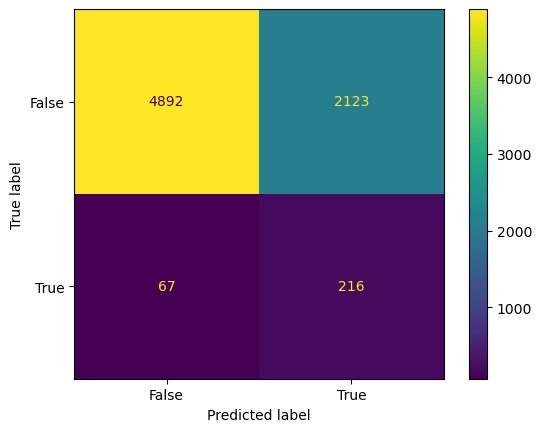

In [25]:
# Default parameters
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestClassifier()
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [26]:
# Grid Search baseline iteration
model = RandomForestClassifier()
parameters = {
    'n_estimators':[80,100,120],
    'max_features':['sqrt', 'log2','auto'],
    'max_depth':[75,79,85,None],
    'min_samples_split':[2,4,6,8],
    'min_samples_leaf':[1,4,6,8]}

tuning_model = GridSearchCV(model,parameters, cv = 3)
tuning_model.fit(x_resampled,y_resampled)
print_results(tuning_model)

BEST PRAMS: {'max_depth': 85, 'max_features': 'sqrt', 'min_samples_leaf': 8, 'min_samples_split': 4, 'n_estimators': 120}

0.687 (+/-0.007) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 80}
0.683 (+/-0.009) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
0.696 (+/-0.009) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 120}
0.691 (+/-0.004) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 80}
0.691 (+/-0.005) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 100}
0.695 (+/-0.002) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 120}
0.685 (+/-0.002) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_sa

Accuracy: 0.697 (0.025)/ Precision: 0.692 (0.030)/ Recall: 0.696 (0.027)/ F1: 0.694 (0.024)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      7015
           1       0.09      0.74      0.16       283

    accuracy                           0.70      7298
   macro avg       0.54      0.72      0.49      7298
weighted avg       0.95      0.70      0.79      7298



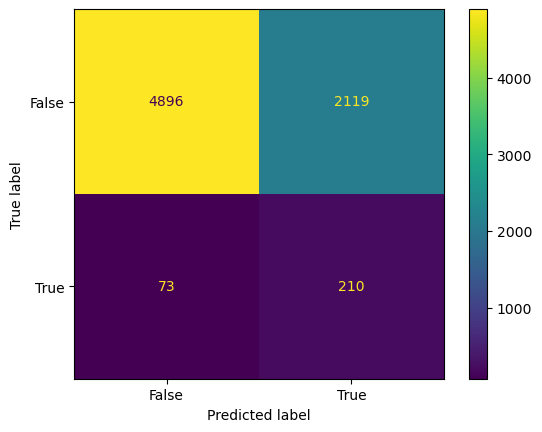

In [32]:
# Best parameters, baseline iteration
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestClassifier(max_depth = 85, max_features = 'sqrt', min_samples_leaf = 8, min_samples_split = 4, n_estimators = 120)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [27]:
# Random search
space = {'max_depth':list(np.arange(10, 100, step=1)),
              'n_estimators':np.arange(10, 100, step=5),
              'max_features':['sqrt', 'log2','auto'],
              'min_samples_leaf':randint(1,5),
              'min_samples_split':np.arange(4, 10, step=1)}

tuning_model = RandomizedSearchCV(model, space, n_iter=100, cv=3)
tuning_model.fit(x_resampled,y_resampled)
print_results(tuning_model)

BEST PRAMS: {'max_depth': 67, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 8, 'n_estimators': 65}

0.682 (+/-0.021) for {'max_depth': 90, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 7, 'n_estimators': 85}
0.664 (+/-0.007) for {'max_depth': 52, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 10}
0.647 (+/-0.017) for {'max_depth': 19, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'n_estimators': 10}
0.69 (+/-0.007) for {'max_depth': 11, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 55}
0.684 (+/-0.019) for {'max_depth': 61, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 45}
0.682 (+/-0.006) for {'max_depth': 85, 'max_features': 'auto', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
0.688 (+/-0.015) for {'max_depth': 47, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_

Accuracy: 0.697 (0.024)/ Precision: 0.699 (0.029)/ Recall: 0.699 (0.027)/ F1: 0.695 (0.025)

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7015
           1       0.09      0.77      0.17       283

    accuracy                           0.70      7298
   macro avg       0.54      0.73      0.49      7298
weighted avg       0.95      0.70      0.79      7298



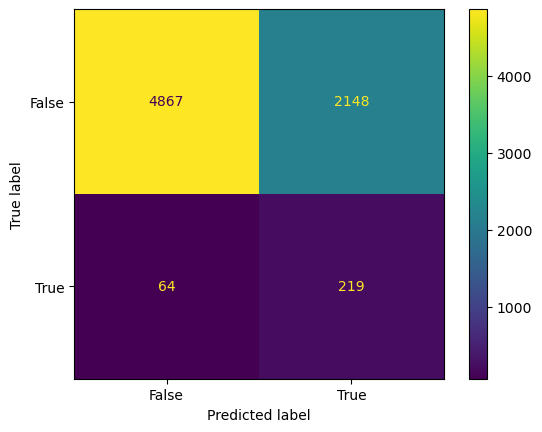

In [28]:
# Best parameters, random search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestClassifier(max_depth = 79, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 4, n_estimators = 85)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [29]:
# Grid Search #1 iteration
model = RandomForestClassifier()
parameters = {
    'n_estimators':[75,85,95],
    'max_features':['sqrt', 'log2','auto'],
    'max_depth':[75,79,85],
    'min_samples_split':[4,6,8],
    'min_samples_leaf':[4,6,8]}

tuning_model = GridSearchCV(model,parameters, cv = 3)
tuning_model.fit(x_resampled,y_resampled)
print_results(tuning_model)

BEST PRAMS: {'max_depth': 75, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 75}

0.692 (+/-0.009) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 75}
0.685 (+/-0.007) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 85}
0.697 (+/-0.014) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 4, 'n_estimators': 95}
0.689 (+/-0.006) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 75}
0.698 (+/-0.013) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 85}
0.695 (+/-0.013) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 95}
0.7 (+/-0.004) for {'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_s

Accuracy: 0.695 (0.020)/ Precision: 0.699 (0.024)/ Recall: 0.695 (0.032)/ F1: 0.694 (0.023)

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7015
           1       0.09      0.77      0.16       283

    accuracy                           0.69      7298
   macro avg       0.54      0.73      0.49      7298
weighted avg       0.95      0.69      0.79      7298



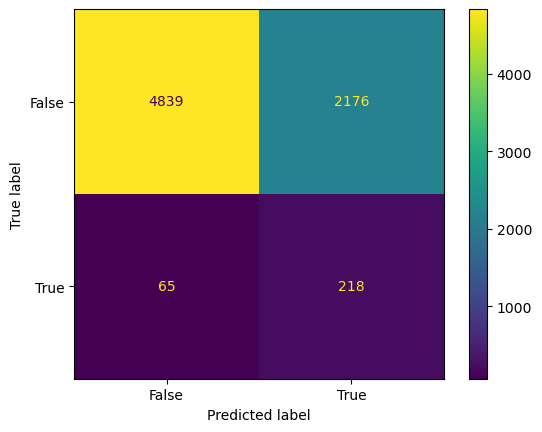

In [30]:
# Best parameters, #1 iteration
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestClassifier(max_depth = 85, max_features = 'sqrt', min_samples_leaf = 8, min_samples_split = 4, n_estimators = 75)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [33]:
# Grid Search #2 iteration
model = RandomForestClassifier()
parameters = {
    'n_estimators':[70,75,80],
    'max_features':['sqrt', 'log2','auto'],
    'max_depth':[80,85,90],
    'min_samples_split':[7,8,9],
    'min_samples_leaf':[4,6,8]}

tuning_model = GridSearchCV(model,parameters, cv = 3)
tuning_model.fit(x_resampled,y_resampled)
print_results(tuning_model)

BEST PRAMS: {'max_depth': 85, 'max_features': 'auto', 'min_samples_leaf': 6, 'min_samples_split': 9, 'n_estimators': 75}

0.693 (+/-0.014) for {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 70}
0.696 (+/-0.014) for {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 75}
0.692 (+/-0.008) for {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 7, 'n_estimators': 80}
0.699 (+/-0.008) for {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 70}
0.692 (+/-0.014) for {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 75}
0.687 (+/-0.014) for {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 80}
0.688 (+/-0.018) for {'max_depth': 80, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples

Accuracy: 0.695 (0.019)/ Precision: 0.697 (0.029)/ Recall: 0.692 (0.041)/ F1: 0.696 (0.018)

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7015
           1       0.09      0.77      0.16       283

    accuracy                           0.69      7298
   macro avg       0.54      0.73      0.49      7298
weighted avg       0.95      0.69      0.79      7298



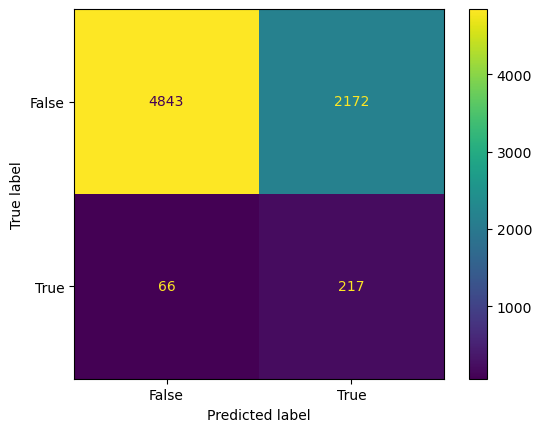

In [34]:
# Best parameters, #2 iteration
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = RandomForestClassifier(max_depth = 85, max_features = 'sqrt', min_samples_leaf = 8, min_samples_split = 9, n_estimators = 70)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

#### Gradient boosting model

Accuracy: 0.688 (0.025)/ Precision: 0.698 (0.029)/ Recall: 0.667 (0.029)/ F1: 0.682 (0.024)

              precision    recall  f1-score   support

           0       0.98      0.70      0.82      7015
           1       0.09      0.73      0.16       283

    accuracy                           0.70      7298
   macro avg       0.54      0.72      0.49      7298
weighted avg       0.95      0.70      0.79      7298



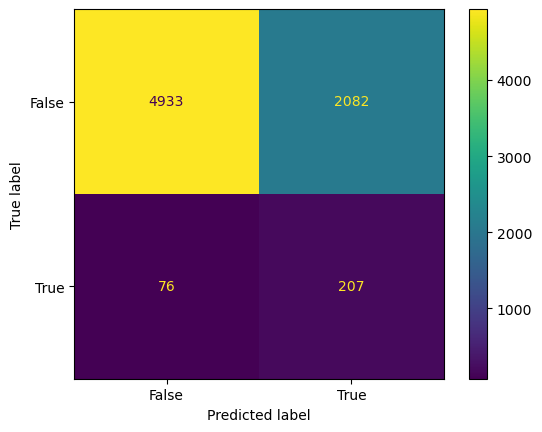

In [35]:
# Default parameters
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = GradientBoostingClassifier()
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [36]:
# Random search
model = GradientBoostingClassifier()
space = {'max_depth':list(np.arange(10, 100, step=1)),
              'n_estimators':np.arange(10, 100, step=5),
              'max_features':['sqrt', 'log2','auto'],
              'min_samples_leaf':randint(1,5),
              'min_samples_split':np.arange(4, 10, step=1),
              'learning_rate':np.arange(0.01, 1, step=0.2)}

tuning_model = RandomizedSearchCV(model, space, n_iter=100, cv=3)
tuning_model.fit(x_resampled,y_resampled)
print_results(tuning_model)

BEST PRAMS: {'learning_rate': 0.21000000000000002, 'max_depth': 66, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 8, 'n_estimators': 80}

0.664 (+/-0.024) for {'learning_rate': 0.81, 'max_depth': 69, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 20}
0.683 (+/-0.017) for {'learning_rate': 0.21000000000000002, 'max_depth': 69, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 60}
0.673 (+/-0.022) for {'learning_rate': 0.41000000000000003, 'max_depth': 32, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 65}
0.681 (+/-0.02) for {'learning_rate': 0.01, 'max_depth': 17, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 20}
0.684 (+/-0.003) for {'learning_rate': 0.01, 'max_depth': 20, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 85}
0.66 (+/-0.005) for {'learning_rate': 0.81, 'm

Accuracy: 0.690 (0.023)/ Precision: 0.693 (0.027)/ Recall: 0.689 (0.038)/ F1: 0.690 (0.024)

              precision    recall  f1-score   support

           0       0.99      0.68      0.81      7015
           1       0.09      0.75      0.16       283

    accuracy                           0.68      7298
   macro avg       0.54      0.72      0.48      7298
weighted avg       0.95      0.68      0.78      7298



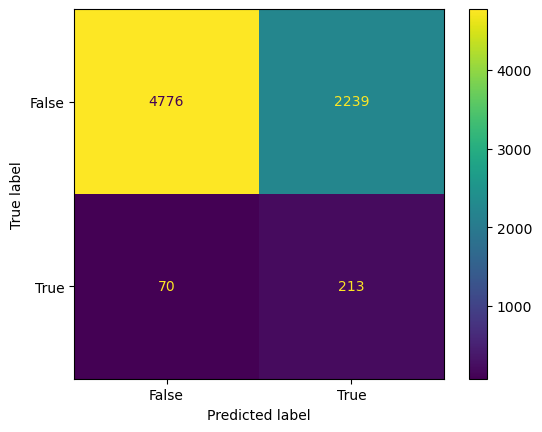

In [37]:
# Best parameters, random search
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = GradientBoostingClassifier(learning_rate = 0.01, max_depth = 81, max_features = 'log2', min_samples_leaf = 3, min_samples_split = 7, n_estimators = 60)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [38]:
# Grid Search #1 iteration
model = GradientBoostingClassifier()
parameters = {'max_depth':[70,80,90],
              'n_estimators':[50,60,70],
              'max_features':['sqrt', 'log2','auto'],
              'min_samples_leaf':[2,3,7],
              'min_samples_split':[5,7,10],
              'learning_rate':np.arange(0.005, 0.01,0.05)}

tuning_model = GridSearchCV(model, parameters, cv=3)
tuning_model.fit(x_resampled,y_resampled)
print_results(tuning_model)

BEST PRAMS: {'learning_rate': 0.005, 'max_depth': 70, 'max_features': 'log2', 'min_samples_leaf': 7, 'min_samples_split': 7, 'n_estimators': 70}

0.681 (+/-0.012) for {'learning_rate': 0.005, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 50}
0.681 (+/-0.013) for {'learning_rate': 0.005, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 60}
0.685 (+/-0.032) for {'learning_rate': 0.005, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 70}
0.682 (+/-0.015) for {'learning_rate': 0.005, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 50}
0.678 (+/-0.015) for {'learning_rate': 0.005, 'max_depth': 70, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 60}
0.686 (+/-0.008) for {'learning_rate': 0.005, 'max_depth': 70, 'max_features': 'sqrt

Accuracy: 0.699 (0.022)/ Precision: 0.699 (0.031)/ Recall: 0.685 (0.032)/ F1: 0.700 (0.023)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      7015
           1       0.09      0.75      0.16       283

    accuracy                           0.70      7298
   macro avg       0.54      0.72      0.49      7298
weighted avg       0.95      0.70      0.79      7298



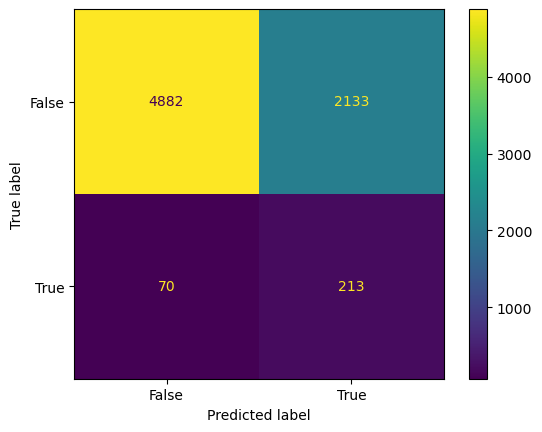

In [39]:
# Best parameters, #1 iteration
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = GradientBoostingClassifier(learning_rate = 0.005, max_depth = 80, max_features = 'sqrt', min_samples_leaf = 7, min_samples_split = 5, n_estimators = 50)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [40]:
# Grid Search #2 iteration
model = GradientBoostingClassifier()
parameters = {'max_depth':[75,80,85],
              'n_estimators':[45,50,55],
              'max_features':['sqrt', 'log2','auto'],
              'min_samples_leaf':[5,7,10],
              'min_samples_split':[5,6,7],
              'learning_rate':np.arange(0.005, 0.007,0.01)}

tuning_model = GridSearchCV(model, parameters, cv=3)
tuning_model.fit(x_resampled,y_resampled)
print_results(tuning_model)

BEST PRAMS: {'learning_rate': 0.005, 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 10, 'min_samples_split': 6, 'n_estimators': 55}

0.694 (+/-0.016) for {'learning_rate': 0.005, 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 45}
0.7 (+/-0.008) for {'learning_rate': 0.005, 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 50}
0.695 (+/-0.009) for {'learning_rate': 0.005, 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 5, 'n_estimators': 55}
0.689 (+/-0.007) for {'learning_rate': 0.005, 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 45}
0.687 (+/-0.017) for {'learning_rate': 0.005, 'max_depth': 75, 'max_features': 'sqrt', 'min_samples_leaf': 5, 'min_samples_split': 6, 'n_estimators': 50}
0.691 (+/-0.006) for {'learning_rate': 0.005, 'max_depth': 75, 'max_features': 'sqrt'

Accuracy: 0.699 (0.027)/ Precision: 0.695 (0.026)/ Recall: 0.698 (0.025)/ F1: 0.700 (0.022)

              precision    recall  f1-score   support

           0       0.99      0.70      0.82      7015
           1       0.09      0.75      0.16       283

    accuracy                           0.70      7298
   macro avg       0.54      0.72      0.49      7298
weighted avg       0.95      0.70      0.79      7298



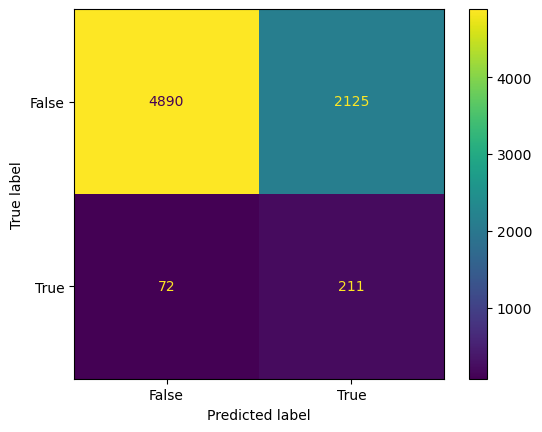

In [41]:
# Best parameters, #2 iteration 
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = GradientBoostingClassifier(learning_rate = 0.005, max_depth = 75, max_features = 'log2', min_samples_leaf = 10, min_samples_split = 6, n_estimators = 55)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

Accuracy: 0.700 (0.023)/ Precision: 0.702 (0.031)/ Recall: 0.689 (0.030)/ F1: 0.698 (0.022)

              precision    recall  f1-score   support

           0       0.99      0.69      0.81      7015
           1       0.09      0.76      0.16       283

    accuracy                           0.70      7298
   macro avg       0.54      0.73      0.49      7298
weighted avg       0.95      0.70      0.79      7298



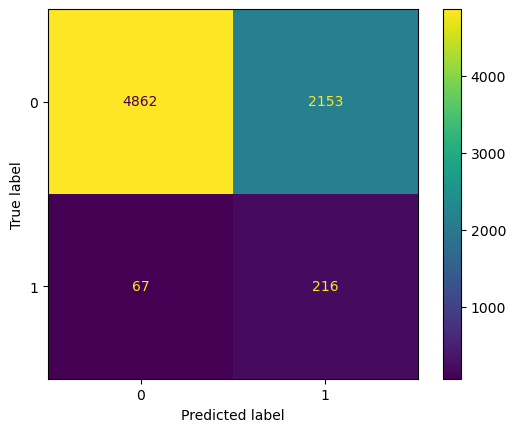

In [168]:
# n-estimators = 500
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = GradientBoostingClassifier(learning_rate = 0.005, max_depth = 75, max_features = 'log2', min_samples_leaf = 10, min_samples_split = 6, n_estimators = 500)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

#### Logistic regression

Accuracy: 0.696 (0.020)/ Precision: 0.720 (0.023)/ Recall: 0.643 (0.035)/ F1: 0.679 (0.025)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      7015
           1       0.10      0.71      0.17       283

    accuracy                           0.74      7298
   macro avg       0.54      0.72      0.51      7298
weighted avg       0.95      0.74      0.82      7298



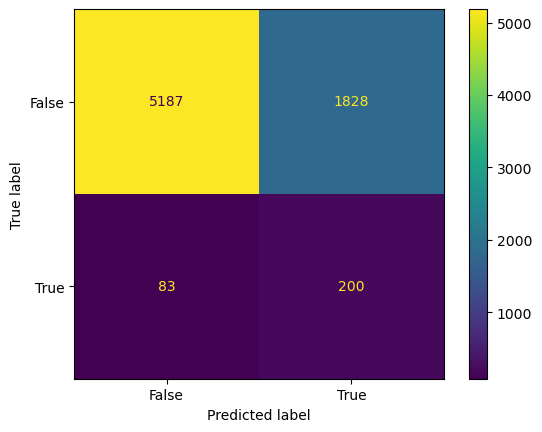

In [42]:
# Default parameters
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = LogisticRegression(max_iter=500)
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [43]:
# Feature selection, backward stepwise
model = LogisticRegression(max_iter=500)
sfsforward = sfs(model, direction='backward', n_jobs = -1)
sfsforward.fit(x_resampled,y_resampled).get_feature_names_out()

array(['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True'],
      dtype=object)

Accuracy: 0.700 (0.021)/ Precision: 0.727 (0.025)/ Recall: 0.641 (0.039)/ F1: 0.680 (0.027)

              precision    recall  f1-score   support

           0       0.98      0.74      0.85      7015
           1       0.10      0.70      0.17       283

    accuracy                           0.74      7298
   macro avg       0.54      0.72      0.51      7298
weighted avg       0.95      0.74      0.82      7298



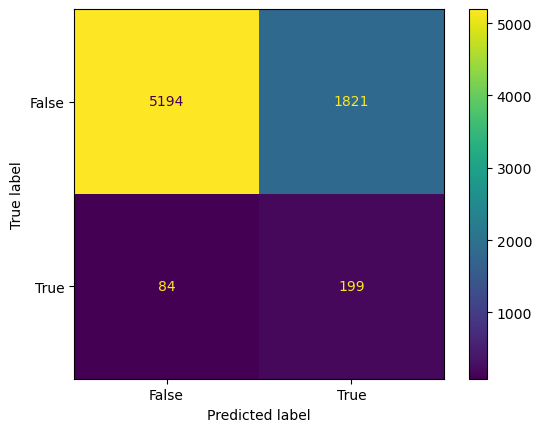

In [44]:
# Selected features
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = LogisticRegression(max_iter=500)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)

scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

In [45]:
# Grid search, l2 regularization
model = LogisticRegression(max_iter=1000)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'penalty':['l2'],
             'class_weight':['auto','balanced','dict'],
             'solver':['saga','sag','newton-cg','liblinear','lbfgs']}

tuning_model = GridSearchCV(model, parameters,cv=3)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
tuning_model.fit(x_resampled[selectedfeatures],y_resampled)
print_results(tuning_model)

BEST PRAMS: {'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}

0.682 (+/-0.035) for {'C': 0.001, 'class_weight': 'auto', 'penalty': 'l2', 'solver': 'saga'}
0.682 (+/-0.035) for {'C': 0.001, 'class_weight': 'auto', 'penalty': 'l2', 'solver': 'sag'}
0.681 (+/-0.036) for {'C': 0.001, 'class_weight': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}
nan (+/-nan) for {'C': 0.001, 'class_weight': 'auto', 'penalty': 'l2', 'solver': 'liblinear'}
0.681 (+/-0.036) for {'C': 0.001, 'class_weight': 'auto', 'penalty': 'l2', 'solver': 'lbfgs'}
0.68 (+/-0.038) for {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'saga'}
0.68 (+/-0.038) for {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'sag'}
0.68 (+/-0.038) for {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'newton-cg'}
0.675 (+/-0.016) for {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear'}
0.68 (+/-0.038) for {'C': 0.001, 'class_wei

C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
42 fits failed out of a total of 315.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1528, in fit
    self.coef_, self.intercept_, n_iter_ = _fit_liblinear(
  File "C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\svm\_base.py", line 1150, in _fit_liblinear
    class_weight_ = compute_cl

Accuracy: 0.693 (0.020)/ Precision: 0.725 (0.025)/ Recall: 0.625 (0.042)/ F1: 0.670 (0.027)

              precision    recall  f1-score   support

           0       0.98      0.75      0.85      7015
           1       0.10      0.68      0.17       283

    accuracy                           0.75      7298
   macro avg       0.54      0.72      0.51      7298
weighted avg       0.95      0.75      0.83      7298



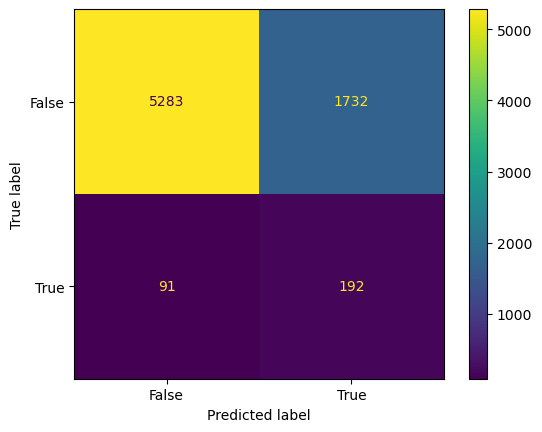

In [46]:
# Best parameters, l2 regularization
model = LogisticRegression(class_weight = 'balanced', penalty='l2',solver='liblinear',max_iter=200, C=0.1)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)

scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

In [48]:
# Grid search, elasticnet regularization
model = LogisticRegression(max_iter=1000)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'penalty':['elasticnet'],
             'class_weight':['auto','balanced'],
             'solver':['saga'],
             'l1_ratio':[0,0.2,0.4,0.6,0.8,1]}

tuning_model = GridSearchCV(model, parameters,cv=3)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
tuning_model.fit(x_resampled[selectedfeatures],y_resampled)
print_results(tuning_model)

BEST PRAMS: {'C': 1, 'class_weight': 'auto', 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}

0.681 (+/-0.036) for {'C': 0.001, 'class_weight': 'auto', 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'auto', 'l1_ratio': 0.2, 'penalty': 'elasticnet', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'auto', 'l1_ratio': 0.4, 'penalty': 'elasticnet', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'auto', 'l1_ratio': 0.6, 'penalty': 'elasticnet', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'auto', 'l1_ratio': 0.8, 'penalty': 'elasticnet', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'auto', 'l1_ratio': 1, 'penalty': 'elasticnet', 'solver': 'saga'}
0.68 (+/-0.038) for {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 0, 'penalty': 'elasticnet', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'balanced', 'l1_ratio': 0.2, 'penal

Accuracy: 0.700 (0.021)/ Precision: 0.727 (0.025)/ Recall: 0.641 (0.039)/ F1: 0.680 (0.027)

              precision    recall  f1-score   support

           0       0.98      0.74      0.84      7015
           1       0.10      0.70      0.17       283

    accuracy                           0.74      7298
   macro avg       0.54      0.72      0.51      7298
weighted avg       0.95      0.74      0.82      7298



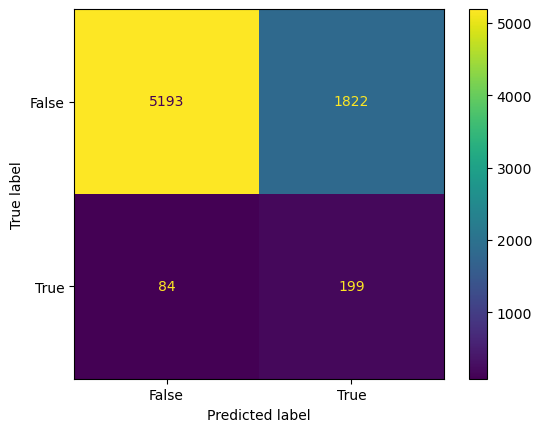

In [49]:
# Best parameters, eleasticnet regularization
model = LogisticRegression(C = 1, class_weight = 'auto', l1_ratio = 0.0, penalty='elasticnet',solver='saga',max_iter=200)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)

scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

In [62]:
# Grid search, l1 regularization
model = LogisticRegression(max_iter=1000)
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'penalty':['l1'],
             'class_weight':[None,'balanced'],
             'solver':['saga','liblinear']}

tuning_model = GridSearchCV(model, parameters,cv=3)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
tuning_model.fit(x_resampled[selectedfeatures],y_resampled)
print_results(tuning_model)

BEST PRAMS: {'C': 10, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}

0.5 (+/-0.001) for {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.001, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.542 (+/-0.119) for {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.01, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}
0.542 (+/-0.119) for {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'saga'}
0.5 (+/-0.001) for {'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l1', 'solver': 'liblinear'}
0.689 (+/-0.02) for {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'saga'}
0.689 (+/-0.02) for {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solve

Accuracy: 0.706 (0.021)/ Precision: 0.725 (0.025)/ Recall: 0.664 (0.033)/ F1: 0.692 (0.024)

              precision    recall  f1-score   support

           0       0.98      0.73      0.84      7015
           1       0.10      0.70      0.17       283

    accuracy                           0.73      7298
   macro avg       0.54      0.72      0.50      7298
weighted avg       0.95      0.73      0.81      7298



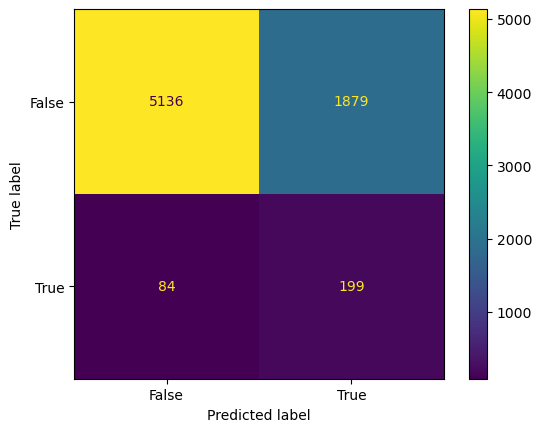

In [63]:
# Best parameters, l1 regularization
model = LogisticRegression(penalty='l1',solver='saga',max_iter=200, class_weight = None, C=10)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)
scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

In [78]:
# Tuning classification threshold with l2 regularization model
model = LogisticRegression(class_weight = 'balanced', penalty='l2',solver='liblinear',max_iter=200, C=0.1)
selectedfeatures = ['age', 'heart_rate_max', 'mbp_max', 'sbp_min', 'sbp_max',
       'sbp_mean', 'dbp_max', 'temperature_mean', 'glucose_min',
       'hemoglobin_min', 'urineoutput', 'charlson_comorbidity_index',
       'gender_M', 'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_cardiovascular_0.0',
       'sofa_cardiovascular_1.0', 'sofa_cardiovascular_3.0',
       'sofa_cardiovascular_4.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_2.0', 'sofa_renal_1.0', 'sofa_renal_3.0', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)

scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

for i in range (1,11):
    y_pred = np.where(model.predict_proba(x_tst[selectedfeatures])[:,1] > i/10, 1, 0)
    target_names = ['0','1']
    print ('Classification threshold:{}'.format (i/10))
    print(classification_report(y_tst, y_pred, target_names=target_names))

Accuracy: 0.693 (0.020)/ Precision: 0.725 (0.025)/ Recall: 0.625 (0.042)/ F1: 0.670 (0.027)

Classification threshold:0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7015
           1       0.04      1.00      0.07       283

    accuracy                           0.04      7298
   macro avg       0.02      0.50      0.04      7298
weighted avg       0.00      0.04      0.00      7298

Classification threshold:0.2
              precision    recall  f1-score   support

           0       1.00      0.03      0.05      7015
           1       0.04      1.00      0.08       283

    accuracy                           0.07      7298
   macro avg       0.52      0.51      0.07      7298
weighted avg       0.96      0.07      0.06      7298

Classification threshold:0.3
              precision    recall  f1-score   support

           0       0.99      0.26      0.42      7015
           1       0.05      0.95      0.09       283

  

C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\

#### Support vector machine

Accuracy: 0.691 (0.020)/ Precision: 0.744 (0.026)/ Recall: 0.583 (0.039)/ F1: 0.653 (0.029)

              precision    recall  f1-score   support

           0       0.98      0.79      0.87      7015
           1       0.11      0.63      0.18       283

    accuracy                           0.78      7298
   macro avg       0.54      0.71      0.53      7298
weighted avg       0.95      0.78      0.85      7298



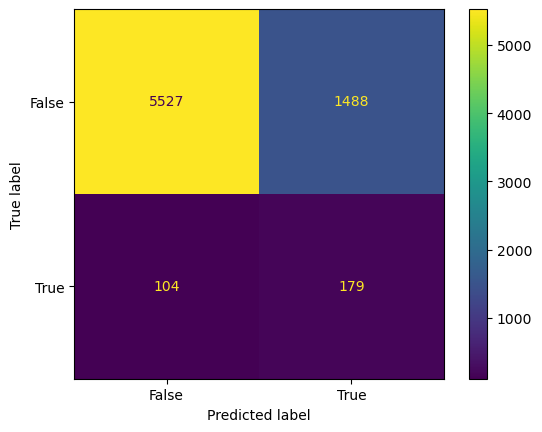

In [54]:
# Default parameters
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=3, random_state=1)
model = svm.SVC()
model.fit(x_resampled,y_resampled)

scoreA = cross_val_score(model, x_resampled,y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled,y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled,y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled,y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst)
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst, y_tst);

In [55]:
# Features selection, backward stepwise
model = svm.SVC()
sfsforward = sfs(model, direction='backward', n_jobs = -1)
sfsforward.fit(x_resampled,y_resampled).get_feature_names_out()

array(['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True'], dtype=object)

Accuracy: 0.696 (0.018)/ Precision: 0.745 (0.020)/ Recall: 0.596 (0.045)/ F1: 0.661 (0.030)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7015
           1       0.11      0.65      0.18       283

    accuracy                           0.78      7298
   macro avg       0.54      0.72      0.53      7298
weighted avg       0.95      0.78      0.84      7298



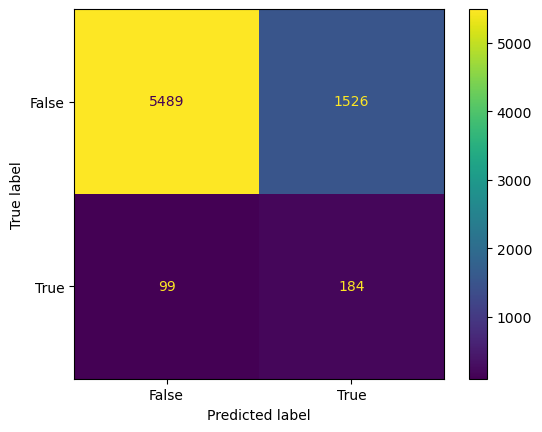

In [59]:
# Selected features
model = svm.SVC()
selectedfeatures = ['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)
scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

In [144]:
# Grid search #1 iteration
model = svm.SVC()
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 
              'kernel':['linear', 'poly', 'rbf', 'sigmoid'],
             'class_weight':['balanced',None,],
             'gamma':['auto','scale']}

tuning_model = GridSearchCV(model, parameters,cv=3)
selectedfeatures = ['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True']
tuning_model.fit(x_resampled[selectedfeatures],y_resampled)
print_results(tuning_model)

BEST PRAMS: {'C': 100, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'poly'}

0.556 (+/-0.16) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'linear'}
0.542 (+/-0.12) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'poly'}
0.556 (+/-0.16) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}
0.556 (+/-0.16) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'sigmoid'}
0.556 (+/-0.16) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'linear'}
0.542 (+/-0.12) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly'}
0.559 (+/-0.168) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'rbf'}
0.541 (+/-0.118) for {'C': 0.001, 'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'sigmoid'}
0.556 (+/-0.16) for {'C': 0.001, 'class_weight': None, 'gamma': 'auto', 'kernel': 'linear'}
0.542 (+/-0.12) for {'C': 0.001, 'class

Accuracy: 0.697 (0.020)/ Precision: 0.741 (0.021)/ Recall: 0.605 (0.045)/ F1: 0.666 (0.031)

              precision    recall  f1-score   support

           0       0.98      0.77      0.86      7015
           1       0.10      0.65      0.18       283

    accuracy                           0.77      7298
   macro avg       0.54      0.71      0.52      7298
weighted avg       0.95      0.77      0.84      7298



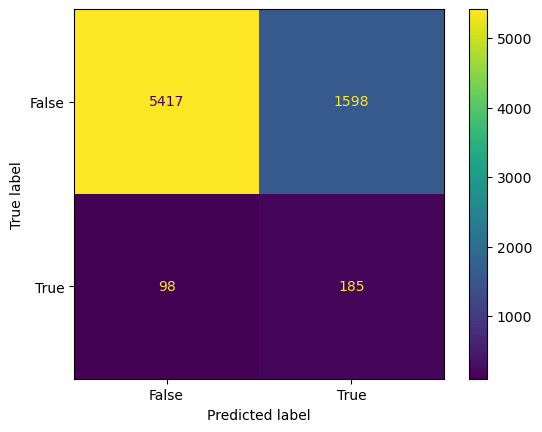

In [145]:
# Best parameters, #1 iteration
model = svm.SVC(C=100, kernel='poly', class_weight = 'balanced', gamma = 'auto')
selectedfeatures = ['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)
scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

Accuracy: 0.696 (0.018)/ Precision: 0.745 (0.020)/ Recall: 0.596 (0.045)/ F1: 0.661 (0.030)

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      7015
           1       0.11      0.65      0.18       283

    accuracy                           0.78      7298
   macro avg       0.54      0.72      0.53      7298
weighted avg       0.95      0.78      0.84      7298



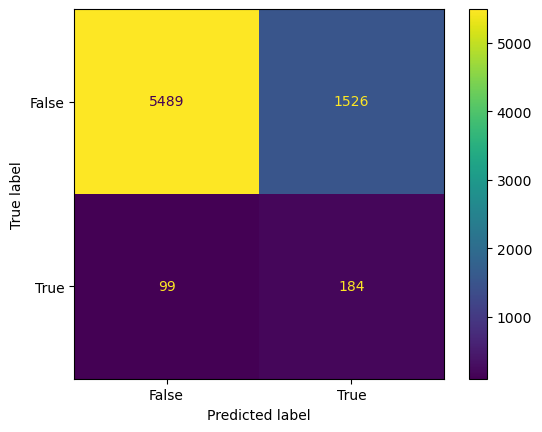

In [80]:
# Default parameters
model = svm.SVC(C=1, kernel='rbf', class_weight = 'balanced')
selectedfeatures = ['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)
scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

Accuracy: 0.691 (0.018)/ Precision: 0.755 (0.022)/ Recall: 0.567 (0.036)/ F1: 0.647 (0.027)

              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7015
           1       0.12      0.62      0.20       283

    accuracy                           0.80      7298
   macro avg       0.55      0.71      0.54      7298
weighted avg       0.95      0.80      0.86      7298



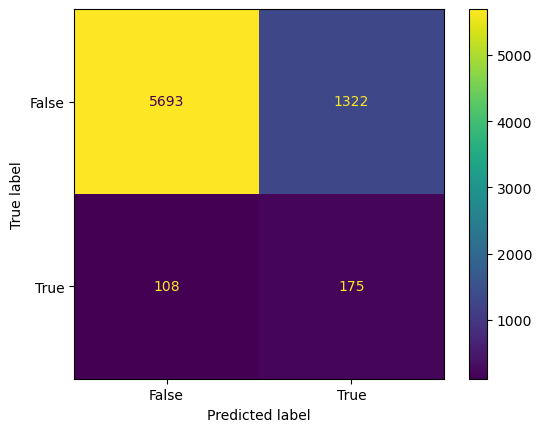

In [142]:
# Default parameters with gamma = 'auto'
model = svm.SVC(C=1, kernel='rbf', class_weight = 'balanced', gamma = 'auto')
selectedfeatures = ['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)
scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

y_pred = model.predict(x_tst[selectedfeatures])
target_names = ['0','1']
print(classification_report(y_tst, y_pred, target_names=target_names))
ConfusionMatrixDisplay.from_estimator(model, x_tst[selectedfeatures], y_tst);

In [147]:
# Tuning classification threshold with default parameters
model = svm.SVC(C=1, kernel='rbf', class_weight = 'balanced', gamma = 'auto', probability=True)
selectedfeatures = ['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True']
model.fit(x_resampled[selectedfeatures],y_resampled)
scoreA = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='accuracy', cv=cv, n_jobs=-1)
scoreP = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='precision', cv=cv, n_jobs=-1)
scoreR = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='recall', cv=cv, n_jobs=-1)
scoreF = cross_val_score(model, x_resampled[selectedfeatures],y_resampled, scoring='f1', cv=cv, n_jobs=-1)
print('Accuracy: %.3f (%.3f)/ Precision: %.3f (%.3f)/ Recall: %.3f (%.3f)/ F1: %.3f (%.3f)\n' % (mean(scoreA), std(scoreA),mean(scoreP), std(scoreP),mean(scoreR), std(scoreR),mean(scoreF), std(scoreF)))

for i in range (1,11):
    y_pred = np.where(model.predict_proba(x_tst[selectedfeatures])[:,1] > i/10, 1, 0)
    target_names = ['0','1']
    print ('Classification threshold:{}'.format (i/10))
    print(classification_report(y_tst, y_pred, target_names=target_names))

Accuracy: 0.691 (0.018)/ Precision: 0.755 (0.022)/ Recall: 0.567 (0.036)/ F1: 0.647 (0.027)

Classification threshold:0.1
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7015
           1       0.04      1.00      0.07       283

    accuracy                           0.04      7298
   macro avg       0.02      0.50      0.04      7298
weighted avg       0.00      0.04      0.00      7298



C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification threshold:0.2
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7015
           1       0.04      1.00      0.07       283

    accuracy                           0.04      7298
   macro avg       0.02      0.50      0.04      7298
weighted avg       0.00      0.04      0.00      7298



C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification threshold:0.3
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7015
           1       0.04      1.00      0.07       283

    accuracy                           0.04      7298
   macro avg       0.02      0.50      0.04      7298
weighted avg       0.00      0.04      0.00      7298



C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification threshold:0.4
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7015
           1       0.12      0.62      0.20       283

    accuracy                           0.80      7298
   macro avg       0.55      0.71      0.54      7298
weighted avg       0.95      0.80      0.86      7298

Classification threshold:0.5
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7015
           1       0.12      0.62      0.20       283

    accuracy                           0.80      7298
   macro avg       0.55      0.71      0.54      7298
weighted avg       0.95      0.80      0.86      7298

Classification threshold:0.6
              precision    recall  f1-score   support

           0       0.98      0.81      0.89      7015
           1       0.12      0.62      0.20       283

    accuracy                           0.80      7298
   macro avg       0.55      0.71      0.

C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification threshold:0.9
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7015
           1       0.00      0.00      0.00       283

    accuracy                           0.96      7298
   macro avg       0.48      0.50      0.49      7298
weighted avg       0.92      0.96      0.94      7298



C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Classification threshold:1.0
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      7015
           1       0.00      0.00      0.00       283

    accuracy                           0.96      7298
   macro avg       0.48      0.50      0.49      7298
weighted avg       0.92      0.96      0.94      7298



C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Z004M8CN\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Inverse undersampling ratio

In [148]:
# SVM model class_weight = 'balanced'
model = svm.SVC(C=1, kernel='rbf', class_weight = 'balanced', gamma = 'auto', probability=True)
selectedfeatures = ['age', 'heart_rate_max', 'heart_rate_mean', 'mbp_max', 'sbp_mean',
       'temperature_min', 'wbc_max', 'creatinine_min', 'creatinine_max',
       'pt_min', 'pt_max', 'charlson_comorbidity_index', 'gender_M',
       'sofa_coagulation_0.0', 'sofa_coagulation_1.0',
       'sofa_coagulation_2.0', 'sofa_coagulation_3.0',
       'sofa_cardiovascular_1.0', 'sofa_cns_0.0', 'sofa_cns_1.0',
       'sofa_cns_4.0', 'sofa_renal_1.0', 'sofa_renal_2.0',
       'sofa_renal_3.0', 'missing_False', 'missing_True']

trn, tst = train_test_split (
    After_imputation,
    test_size=0.20,
    random_state=10)

y_tstu = tst['outcome']
x_tstu = tst.drop(['outcome'],axis=1)

trnT = trn[trn['outcome']==True]
trnF = trn[trn['outcome']==False]

a = []
p = []
r = []
f = []

for i in range (1,21):
    y_n = int(len(trnT)*(i/10))
    x_undersampled = pd.concat([trnT,trnF.sample(n=y_n)])
    y_undersampled = x_undersampled['outcome']
    x_undersampled = x_undersampled.drop(['outcome'],axis=1)
    
    model.fit(x_undersampled[selectedfeatures],y_undersampled)
    y_pred = model.predict(x_tstu[selectedfeatures])
    accuracy = round(accuracy_score(y_tstu, y_pred),3)
    precision = round(precision_score(y_tstu, y_pred,average='macro',zero_division=1),3)
    recall = round(recall_score(y_tstu, y_pred,average='macro'),3)
    f1 = round(f1_score(y_tstu, y_pred, average='macro'),3)
    a.append(accuracy)
    p.append(precision)
    r.append(recall)
    f.append(f1)
    print ('Majority class percentage:{}'.format (i/10))
    print(classification_report(y_tstu, y_pred, target_names=target_names))

Majority class percentage:0.1
              precision    recall  f1-score   support

           0       0.99      0.43      0.60      7022
           1       0.06      0.87      0.11       276

    accuracy                           0.44      7298
   macro avg       0.52      0.65      0.35      7298
weighted avg       0.95      0.44      0.58      7298

Majority class percentage:0.2
              precision    recall  f1-score   support

           0       0.98      0.82      0.89      7022
           1       0.12      0.59      0.19       276

    accuracy                           0.81      7298
   macro avg       0.55      0.70      0.54      7298
weighted avg       0.95      0.81      0.87      7298

Majority class percentage:0.3
              precision    recall  f1-score   support

           0       0.98      0.82      0.90      7022
           1       0.12      0.59      0.19       276

    accuracy                           0.81      7298
   macro avg       0.55      0.71     

In [95]:
y_undersampled.value_counts()

False    2106
True     1053
Name: outcome, dtype: int64

# Two stage classifier approach

In [193]:
# Let me know if you are interested to see the code. 